# Pandas

## 导入
`import pandas as pd`

`from pandas import DataFrame`

`from pandas import Series`

In [10]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

## Series

### 参数


| 参数名称 | 描述                                                         |
| :------- | :------------------------------------------------------------- |
| data     | 输入的数据，可以是列表、常量、ndarray 数组等。 |
| index    | 索引值必须是惟一的，如果没有传递索引，则默认为 np.arrange(n)。 |
| dtype    | dtype表示数据类型，如果没有提供，则会自动判断得出。 |
| copy     | 表示对 data 进行拷贝，默认为 False。               |

In [23]:
from pandas import Series
s = Series(data=[i for i in range(50,54)],index=["a","b","v","m"])
print(s)

a    50
b    51
v    52
m    53
dtype: int64


+ data 内容可以是列表，np数组，或者字典

### 取值

+ 索引
    
    s[1]

+ 索引标签
    
    s["a"]

In [29]:
print(s[0])
print(s[[0,1,2,3]])
print(s[["a","b",]])

1
a    1
b    2
c    5
d    8
dtype: int64
a    1
b    2
dtype: int64


### 切片

### 常用属性

| 名称   | 属性                                             |
|:-------|:-------------------------------------------------|
| axes   | 以列表的形式返回所有行索引标签。                 |
| dtype  | 返回对象的数据类型。                             |
| empty  | 返回一个空的 Series 对象。                       |
| ndim   | 返回输入数据的维数。                             |
| size   | 返回输入数据的元素数量。                         |
| values | 以 ndarray 的形式返回 Series 对象。              |
| index  | 返回一个RangeIndex对象，用来描述索引的取值范围。 |


### 常用方法

head(): 头几个

tail()：尾几个

+ 默认为5个

isnull() 

nonull()

+ 判断是否为空

## DataFrame

### 参数

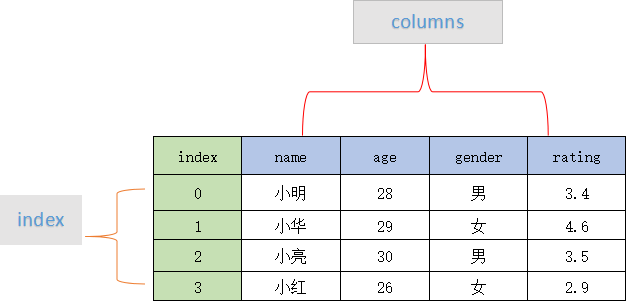

| 参数名称 | 说明                                                                                 |
|:---------|:-------------------------------------------------------------------------------------|
| data     | 输入的数据，可以是 ndarray，series，list，dict，标量以及一个 DataFrame。             |
| index    | 行标签，如果没有传递 index 值，则默认行标签是 np.arange(n)，n 代表 data 的元素个数。 |
| columns  | 列标签，如果没有传递 columns 值，则默认列标签是 np.arange(n)。                       |
| dtype    | dtype表示每一列的数据类型。                                                          |
| copy     | 默认为 False，表示复制数据 data。                                                    |


+ data参数说明

最小的每个list是一行，若key有缺失补空值

默认情况，字典的键作为列名，且定义中colums= [] 无法覆盖列名，只会追加空列

使用series数据创建，将series作为字典的值，其index作为df数据的index，字典的key作为colums

In [34]:
import pandas as pd
data = [[1,2,3,4,5],[6,7,8,9]]
df = pd.DataFrame(data)
print(df)

   0  1  2  3    4
0  1  2  3  4  5.0
1  6  7  8  9  NaN


In [38]:
import pandas as pd
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data)
print(df)

   a   b     c
0  1   2   NaN
1  5  10  20.0


In [40]:
import pandas as pd
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
print(df)

        Name  Age
rank1    Tom   28
rank2   Jack   34
rank3  Steve   29
rank4  Ricky   42


In [41]:
import pandas as pd
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
print(df)

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


### 列索引操作DataFrame

#### 取列

+ 示例

In [76]:
import pandas as pd
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
print(df)

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


直接使用下标则取到对应的列

如df["one"]

In [77]:
df["one"] # 只能这样取

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

#### 增加列

In [78]:
df["three"] = [11,22,33,44]

In [79]:
df["four"] = pd.Series(data=[111,222,333,444,555],index=list("abcde"))

In [82]:
df["four"]

a    111
b    222
c    333
d    444
Name: four, dtype: int64

+ 若所插入列长度比df长度大，则会被裁剪掉

In [87]:
df.insert(loc=0,column="six",value=list("dong"))

df

df.insert(loc,colum,value)

loc：在第几列后面插入

colun： 新列名称

value：值，长度对应df长度

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   six     4 non-null      object 
 1   one     3 non-null      float64
 2   five    4 non-null      object 
 3   two     4 non-null      int64  
 4   three   4 non-null      int64  
 5   four    4 non-null      int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 396.0+ bytes


#### 删除列

+ del df["列名"]
+ df.pop("列名")

In [105]:
df

,one,two,three,four
a,1.0,1,11,111
b,2.0,2,22,222
c,3.0,3,33,333
d,NaN,4,44,444


In [102]:
df.pop("six")
print(df)

   one five  two  three  four
a  1.0    l    1     11   111
b  2.0    i    2     22   222
c  3.0    u    3     33   333
d  NaN    d    4     44   444


In [106]:
del df["four"]
print(df)

### 行索引操作DataFrame

#### 取行

+ 示例

In [126]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=np.arange(12).reshape(3,4),index=list("XYZ"),columns=list("ABCD"))
print(df)

   A  B   C   D
X  0  1   2   3
Y  4  5   6   7
Z  8  9  10  11


+ 使用.loc[],传入显示标签，可传入列表，[[行标签]，[列标签]]

In [138]:
df

,A,B,C,D
X,0,1,2,3
Y,4,5,6,7
Z,8,9,10,11


In [146]:
df.loc[["X","Y"],["B","C"]]

,B,C
X,1,2
Y,5,6


+ 使用iloc[],传入行列号,可传入列表取范围

In [147]:
df

,A,B,C,D
X,0,1,2,3
Y,4,5,6,7
Z,8,9,10,11


In [149]:
df.iloc[[0,1,2],[0,1,2]]

,A,B,C
X,0,1,2
Y,4,5,6
Z,8,9,10


+ 切片,左开右闭

In [150]:
df

,A,B,C,D
X,0,1,2,3
Y,4,5,6,7
Z,8,9,10,11


In [153]:
df[0:2]

,A,B,C,D
X,0,1,2,3
Y,4,5,6,7


In [156]:
df[[0:2],[1:3]]

SyntaxError: invalid syntax (Temp/ipykernel_4488/1782802629.py, line 1)

### 切片操作总解

* 示例

In [157]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=np.arange(12).reshape(3,4),index=list("XYZ"),columns=list("ABCD"))
print(df)

   A  B   C   D
X  0  1   2   3
Y  4  5   6   7
Z  8  9  10  11


#### 只取行

+ 取单行,loc[行名称]或者iloc[行号]。

返回值是Series,如果放入列表内，则返回DataFrame

**不能df[行号/行名称]，但是可以df[行号：行号]切片**

In [173]:
x1 = df.loc["X"]
x2 = df.iloc[0]
x3 = df.loc[["X"]] 
x4 = df.iloc[[0]]
print(x1)
print(x2)
print(x3)
print(x4)
print(type(x1))  # Series
print(type(x2))  # Series
print(type(x3))  # DataFrame
print(type(x4))  # DataFrame

A    0
B    1
C    2
D    3
Name: X, dtype: int32
A    0
B    1
C    2
D    3
Name: X, dtype: int32
   A  B  C  D
X  0  1  2  3
   A  B  C  D
X  0  1  2  3
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


+ 取连续多行

.loc[行名称：行名称]

.iloc[行号：行号]

df[行号：行号]

In [179]:
x5 = df.loc["X":"Y"]
print(x5)
x6 = df.iloc[0:2]
print(x6)
x7 = df[0:2]
print(x7)

   A  B  C  D
X  0  1  2  3
Y  4  5  6  7
   A  B  C  D
X  0  1  2  3
Y  4  5  6  7
   A  B  C  D
X  0  1  2  3
Y  4  5  6  7


+ 不连续多行

.loc[[行名称1,行名称2]]

.iloc[[行号1，行号2]]

In [181]:
x8 = df.loc[["X","Z"]]
print(x8)
x9 = df.iloc[[0,2]]
print(x9)

   A  B   C   D
X  0  1   2   3
Z  8  9  10  11
   A  B   C   D
X  0  1   2   3
Z  8  9  10  11


#### 只取列

+ 示例

In [191]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=np.arange(64).reshape(8,8),index=list("STUVWXYZ"),columns=list("ABCDEFGH"))
print(df)

    A   B   C   D   E   F   G   H
S   0   1   2   3   4   5   6   7
T   8   9  10  11  12  13  14  15
U  16  17  18  19  20  21  22  23
V  24  25  26  27  28  29  30  31
W  32  33  34  35  36  37  38  39
X  40  41  42  43  44  45  46  47
Y  48  49  50  51  52  53  54  55
Z  56  57  58  59  60  61  62  63


+ 取单列

直接[]取

loc[:,列名称]

iloc[:,列号]

**和取行一个概念**

In [192]:
y1 = df["A"]
print(y1)  # Series
# y1 = df[1]  # 不能这么用

S     0
T     8
U    16
V    24
W    32
X    40
Y    48
Z    56
Name: A, dtype: int32


+ 取不连续多行

+ 取连续多行

**都是用loc和iloc取**，无非前面多了个冒号逗号

#### 取行也取列

必须用loc或者iloc了

In [195]:
df.iloc[0:3,4:6] # 左开右闭

,E,F
S,4,5
T,12,13
U,20,21


In [198]:
df.loc["S":"W","A":"D"]  # 两边都能取得到

,A,B,C,D
S,0,1,2,3
T,8,9,10,11
U,16,17,18,19
V,24,25,26,27
W,32,33,34,35
